## Final Project Submission

Please fill out:
* Student name: Alice Wanjiru Wamuyu
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Asha deen
* Blog post URL:


# House Data Analysis

## Overview

This project analyzes the King county house sales dataset for Kings' real estate agency that helps homeowners buy and sell homes. I will use regression modelling in the Analysis.

## Business Problem

Kings' real estate agency helps homeowners buy and/or sell homes. There is a need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## Data Understanding
For this analysis, I used the King county house sales dataset. This datasets contain information on the houses built between  1900 and 2015. 
My target variables are: Bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built

## Importing relevant libraries

In [3]:
# importing pandas for data wrangling and manipulation
import pandas as pd

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

# numpy for numerical operation and arrays
import numpy as np

# importing libraries needed for the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the data

In [124]:
# Your code here - remember to use markdown cells for comments as well!
#importing data
Data = pd.read_csv("C:/Users/This PC/Downloads/kc_house_data.csv")

In [126]:
#checking the first 5 rows
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning

1)Removing columns that aren't required

In [112]:
irrelevant_columns = ['date', 'view', 'sqft_above', 'sqft_basement', 
'yr_renovated', 'zipcode','lat','long','sqft_living15','sqft_lot15','waterfront','id','yr_built']
Data.drop(irrelevant_columns, axis=1, inplace = True)

In [81]:
# getting more information about the columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [113]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900.0,3,1.00,1180,5650,1.0,3,7
1,538000.0,3,2.25,2570,7242,2.0,3,7
2,180000.0,2,1.00,770,10000,1.0,3,6
3,604000.0,4,3.00,1960,5000,1.0,5,7
4,510000.0,3,2.00,1680,8080,1.0,3,8


In [83]:
#converting bathroom and floors data types from float to int64
convert_dict = {'bathrooms': int,'floors':int }
Data = Data.astype(convert_dict)

In [84]:
Data.dtypes

price          float64
bedrooms         int64
bathrooms        int32
sqft_living      int64
sqft_lot         int64
floors           int32
condition        int64
grade            int64
dtype: object

From my analyses below, waterfront has no relationship with any of the variables. Since it has missing values, I dropped the waterfront column

## Checking for duplicates and dropping duplicated values

In [85]:
Data.duplicated().value_counts()

False    21588
True         9
dtype: int64

In [86]:
##checking for duplicates
Data.duplicated().sum()

9

In [87]:
Data.drop_duplicates(inplace = True)

In [88]:
Data.duplicated().sum()

0

In [89]:
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900.0,3,1,1180,5650,1,3,7
1,538000.0,3,2,2570,7242,2,3,7
2,180000.0,2,1,770,10000,1,3,6
3,604000.0,4,3,1960,5000,1,5,7
4,510000.0,3,2,1680,8080,1,3,8
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3,3,8
21593,400000.0,4,2,2310,5813,2,3,8
21594,402101.0,2,0,1020,1350,2,3,7
21595,400000.0,3,2,1600,2388,2,3,8


# Exploratory Data Analysis 

In [90]:
#Description of the data using 5-point statistics
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000
mean,5.403040e+05,3.373263,1.750602,2080.408607,1.510453e+04,1.445664,3.409950,7.657588
std,3.674363e+05,0.926348,0.734098,918.246580,4.142048e+04,0.551480,0.650621,1.173290
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,1.000000,3.000000
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.042750e+03,1.000000,3.000000,7.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.620000e+03,1.000000,3.000000,7.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068825e+04,2.000000,4.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,5.000000,13.000000


## Correlation between variables


In [91]:
dependent = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','condition','grade',]

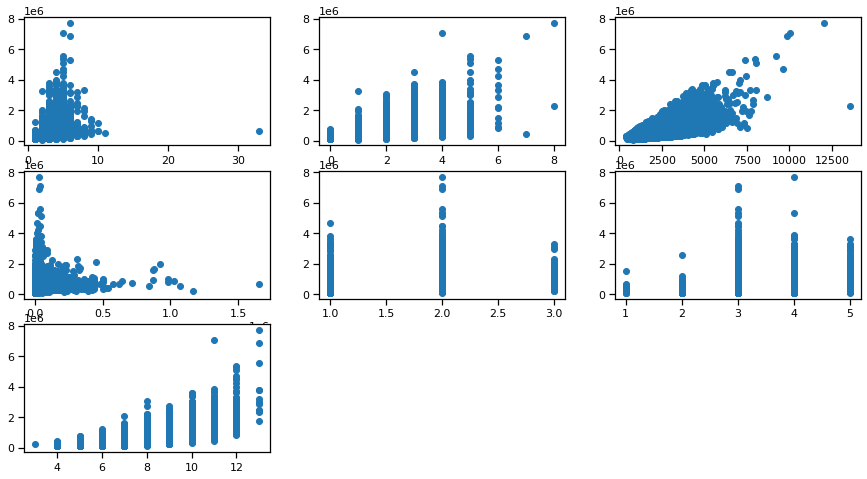

In [92]:
plt.figure(figsize=(15,8))
for i in enumerate(dependent):
    plt.subplot(3,3,i[0]+1 )
    plt.scatter(x =i[1], y ='price', data= Data)

From the scatter plots above, we confirm that condition and grade are categorical variables.
Condition ranges from 1-5. 1 Representing Poor- Worn out,2 represents Fair- Badly worn, 3 represents Average, 4 represents Good and 5 represents Very Good.

Grade ranges from 3 to 13.
Grades run from grade 1 to 13 and are generally defined as;
1-3: Falls short of minimum building standards.
4: Generally older, low quality construction. Does not meet code.
5: Low construction costs and workmanship. Small, simple design.
6: Lowest grade currently meeting building code. Low quality materials and simple designs.
7: Average grade of construction and design. Commonly seen in plats and older sub-divisions.
8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
9: Better architectural design with extra interior and exterior design and quality
10: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble and entry ways

source:https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r



The grade of a house and the area of the living space has a linear relationship with the price of the house.

In [93]:
datacorr = Data.corr()
datacorr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
price,1.000000,0.308844,0.510712,0.701940,0.089873,0.237405,0.036046,0.668076
bedrooms,0.308844,1.000000,0.466194,0.578213,0.032447,0.158310,0.026411,0.356791
bathrooms,0.510712,0.466194,1.000000,0.698736,0.086074,0.486705,-0.127234,0.607238
sqft_living,0.701940,0.578213,0.698736,1.000000,0.173430,0.353775,-0.059539,0.763029
sqft_lot,0.089873,0.032447,0.086074,0.173430,1.000000,-0.008427,-0.008897,0.114834
floors,0.237405,0.158310,0.486705,0.353775,-0.008427,1.000000,-0.293348,0.473185
condition,0.036046,0.026411,-0.127234,-0.059539,-0.008897,-0.293348,1.000000,-0.146773
grade,0.668076,0.356791,0.607238,0.763029,0.114834,0.473185,-0.146773,1.000000


<AxesSubplot:>

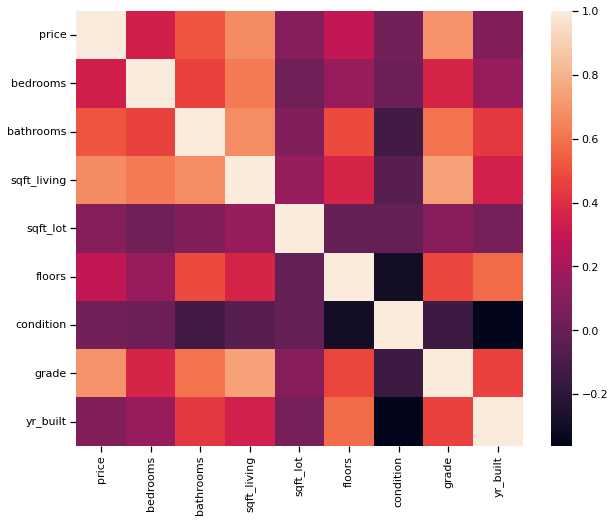

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(datacorr)

From the heat map above, we see that the grade of a house and the area of the living space significantly affects the price of the house.

## Checking for Multicollinearity
predictors with overly high pairwise-correlation (r > .65) are almost certain to produce multicollinearity in a model. With that, I generated the pairwise (pearson) correlation coefficients of your predictive features and visualized these coefficients as a heatmap.

In [94]:
dependent = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','condition','grade']
corr = Data[dependent].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
bedrooms,1.000000,0.466194,0.578213,0.032447,0.158310,0.026411,0.356791
bathrooms,0.466194,1.000000,0.698736,0.086074,0.486705,-0.127234,0.607238
sqft_living,0.578213,0.698736,1.000000,0.173430,0.353775,-0.059539,0.763029
sqft_lot,0.032447,0.086074,0.173430,1.000000,-0.008427,-0.008897,0.114834
floors,0.158310,0.486705,0.353775,-0.008427,1.000000,-0.293348,0.473185
condition,0.026411,-0.127234,-0.059539,-0.008897,-0.293348,1.000000,-0.146773
grade,0.356791,0.607238,0.763029,0.114834,0.473185,-0.146773,1.000000


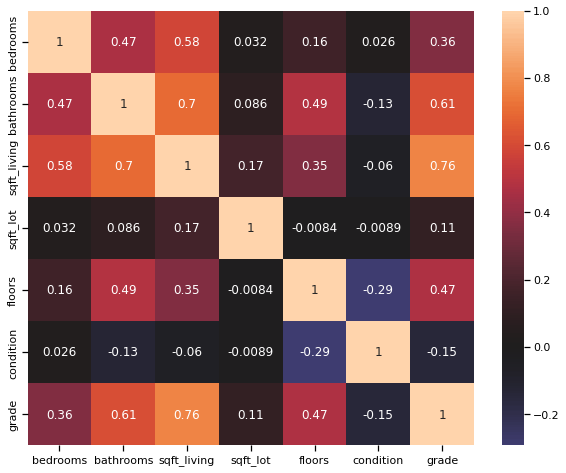

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, center=0, annot=True);

No correlation is greater than 0.65 hence there is no multicollinearity

# Using pandas to plot histograms for all the numeric variables in the dataset.

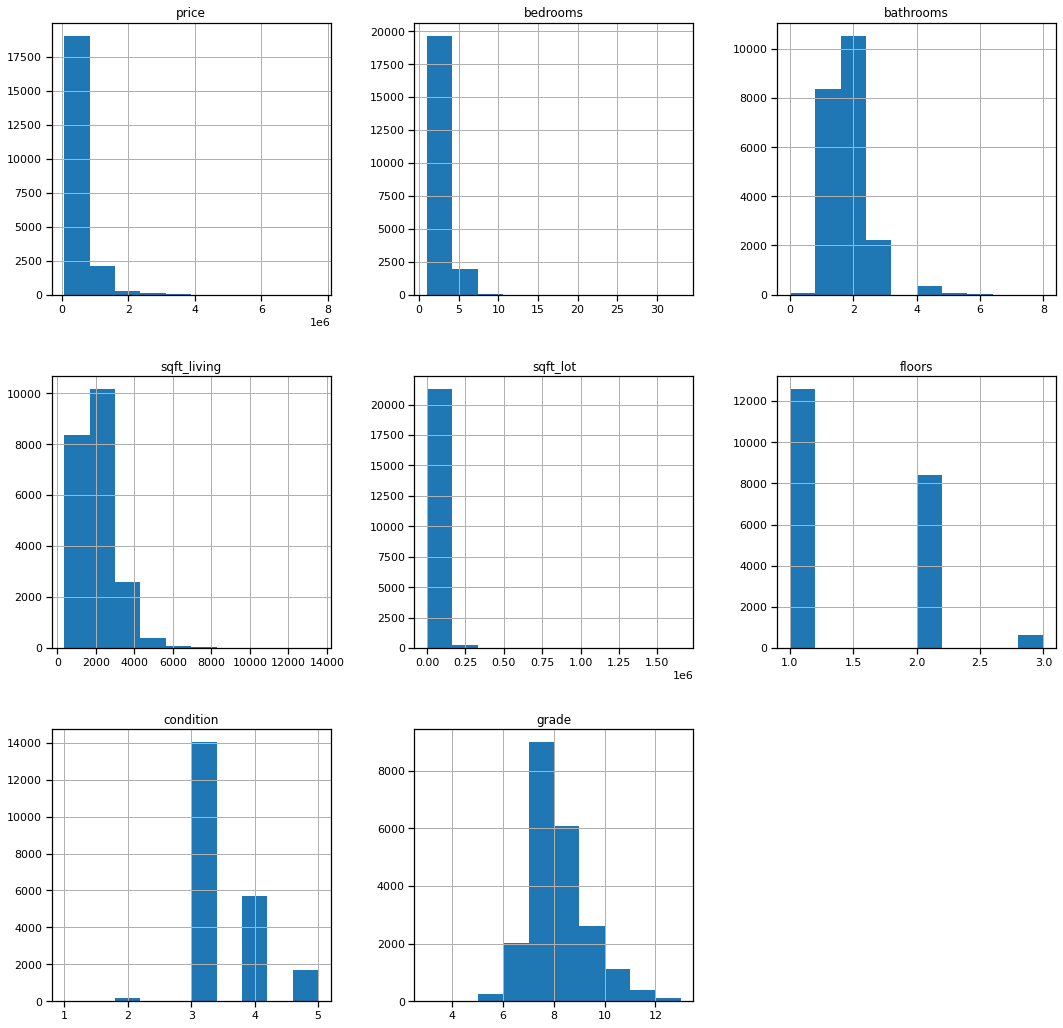

In [96]:
Data.hist(figsize = (18,18));

These variables have a skewed distribution hence they are not perfectly normal.

## Using Log Transformations to normalize the non- normal data

In [97]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)

In [98]:
x_cols = ['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','condition','grade']

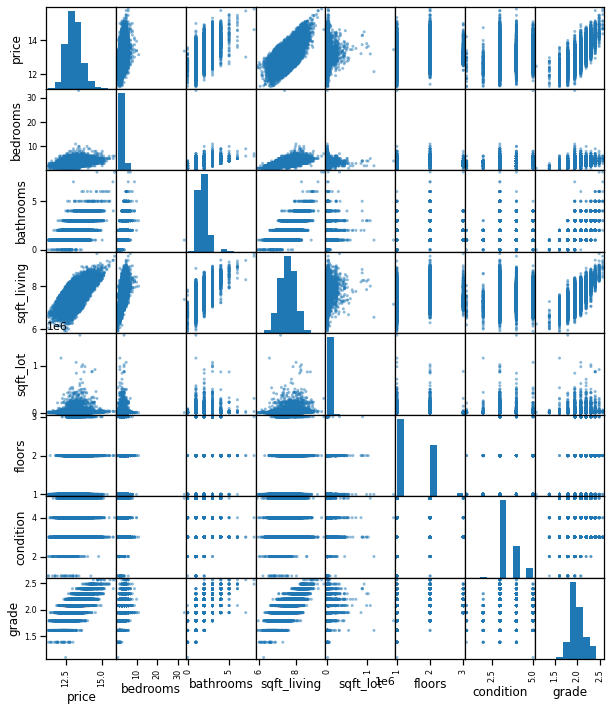

In [99]:
non_normal = ['sqft_living', 'price','grade']
for t in non_normal:
    Data[t] = Data[t].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(Data[x_cols], figsize=(10,12));

## Check for Linearity

Testing the linearity assumption in linear regression modeling.The dependent variable should be linearly related to the independent variables


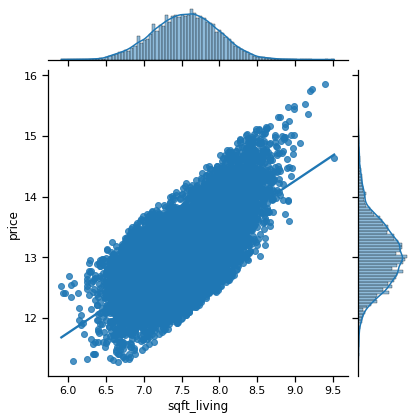

In [100]:
##Testing if there is any linear relationship between the price of a house and sqft_living. 
sns.jointplot('sqft_living','price', data=Data, kind='reg');

There seems to be a linear correlation between the sqft_living and the price of the house.

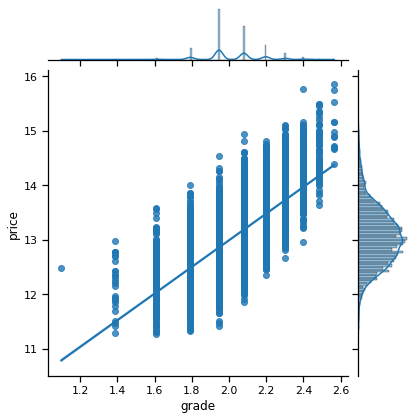

In [101]:
##Testing if there is any linear relationship between the price of a house and grade.
sns.jointplot('grade','price', data=Data, kind='reg');

There is also a linear correlation between the grade and the price of the house.

## Modelling the data

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

## Building a Baseline Model

I built a linear regression model using the feature that is most correlated with price it being sqft_living to serve as my baseline model.

In [102]:
X = Data.drop('price', axis=1)
y = Data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
#Instantiate Linear regression model
most_correlated_feature = 'sqft_living'
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train r-squared score:", baseline_scores["train_score"].mean())
print("Test r-squared score:", baseline_scores["test_score"].mean())

Train r-squared score: 0.4595857127745156
Test r-squared score: 0.4494190366156639


Observations:

R_squared is 0.45. This shows that our model is weak.
The test subset performs slightly better than the training subset.
There is a nearly identical performance in the training and test subsets, both indicating a variance of around 44%.

## Second model with all features.

In [104]:
second_model_features = X_train.drop('sqft_living', axis=1)

In [105]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Second Model")
print("Train r-squared score:", second_model_scores["train_score"].mean())
print("Test r-squared score: ", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train r-squared score:", baseline_scores["train_score"].mean())
print("Test r-squared score: ", baseline_scores["test_score"].mean())

Second Model
Train r-squared score: 0.5637165632123797
Test r-squared score:  0.5536893641933631

Baseline Model
Train r-squared score: 0.4595857127745156
Test r-squared score:  0.4494190366156639


The second model performs better than the baseline model in both the training and test subset.
The test subset of the second model performs better than the training subset.
The difference in the r_squared value of the training and test subset is small meaning the model will perform well with unknown data. 
The second model will be the final model

In [106]:
outcome = 'price'
variables2 =['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','condition','grade']
predictors = '+'.join(variables2)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=Data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     3886.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:29:41   Log-Likelihood:                -7984.8
No. Observations:               21588   AIC:                         1.599e+04
Df Residuals:                   21580   BIC:                         1.605e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.2285      0.059    106.275      0.000       6.114       6.343
bedrooms       -0.0421      0.003    -12.404      0.000      -0.049      -0.035
bathrooms       0.0499      0.005     10.438      0.000       0.041       0.059
sqft_living     0.4507      0.011     41.437      0.000       0.429       0.472
sqft_lot    -5.385e-08   5.86e-08     -0.919      0.358   -1.69e-07     6.1e-08
floors         -0.0464      0.005     -8.654      0.000      -0.057      -0.036
condition       0.0962      0.004     24.943      0.000       0.089       0.104
grade           1.5862      0.026     61.160      0.000       1.535       1.637
==============================================================================
Omnibus:                       99.046   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.445
Skew:                           0.163   Prob(JB):                     1.54e-22
Kurtosis:                       3.073   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All features have a statistically significant p_value. This means that all the features are required to make the best model

In [114]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900.0,3,1.00,1180,5650,1.0,3,7
1,538000.0,3,2.25,2570,7242,2.0,3,7
2,180000.0,2,1.00,770,10000,1.0,3,6
3,604000.0,4,3.00,1960,5000,1.0,5,7
4,510000.0,3,2.00,1680,8080,1.0,3,8


Using our model,we can easily calculate the change in price of a house built in 1933, has a housing living space of 770, grade 6,condition 3 and goes for 180000 if renovations were made increasing the living space to 1000 and fittings made to increase the grade and condition to 13 and 5 respectively, holding all other factors constant. Using our intercept and co efficients and replacing them in out multiple linear regression equation

In [118]:
#getting the intercept
intercept = 180000+(0.0421*2)-(0.0499*1)-(0.4507*770)+(5.385e-08*10000)+(0.0464*1)-(0.0962*3)-(1.5862*6)
intercept

179643.2364385

In [123]:
Price_after_renovation = 179643.2364385-(0.0421*2)+(0.0499*1)+(0.4507*2500)-(5.385e-08*10000)-(0.0464*1)+(0.0962*5)+(1.5862*13)
Price_after_renovation

180791.0068

In [131]:
(791.0068/180000)*100

0.43944822222222224

## Checking for the Normality Assumption

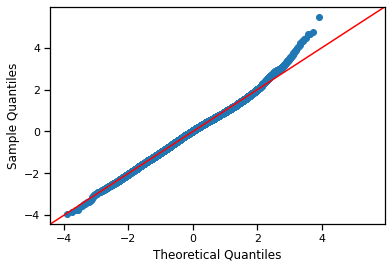

In [34]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Conclusion

The square footage of interior housing living space and the Grade of the house has a somewhat positive linear relationship. This means that an increase in the interior housing living space will lead to an increase in the price of the house similarily for the grade.

The MSEs for the train and test subsets are almost similar, which suggests that the model will perform similarly on different data.

Using our model,we have seen that the price of the house increased by 0.43% after renovations